# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [13]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [14]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru
...,...,...,...,...
1790,Austria,3.75,70%,Peru
1791,Austria,3.00,65%,Congo
1792,Austria,3.50,65%,India
1793,Austria,3.25,62%,India


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

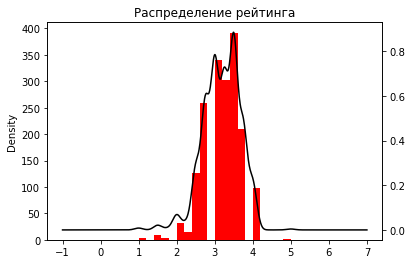

In [15]:
g = best_bar.rate.plot(kind='hist', bins= 20, 
                   title='Распределение рейтинга', color = 'red')
best_bar.rate.plot(kind='kde', ax = g, secondary_y = True, color = 'black')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получиться.

In [16]:
best_bar.percent.dtypes

dtype('O')

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

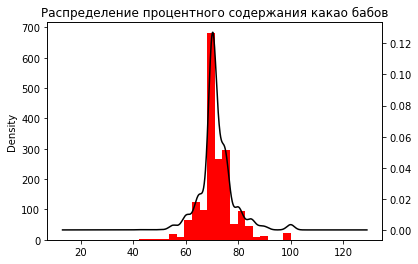

In [18]:
best_bar.percent = best_bar.percent.apply(lambda x: x[:-1]).astype(float)
h = best_bar.percent.plot(kind='hist', bins= 20, 
                      title='Распределение процентного содержания какао бабов',
                      color = 'red')
best_bar.percent.plot(kind='kde', ax = h, secondary_y = True, color = 'black')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

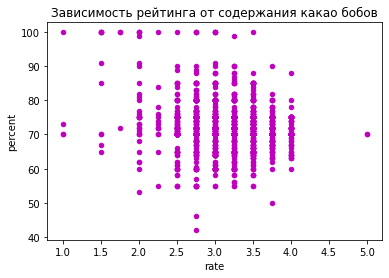

In [24]:
best_bar.plot(kind='scatter', x='rate', y='percent', 
              title = 'Зависимость рейтинга от содержания какао бобов',
              color = 'm')

**Можем заметить, что потребителям больше нравятся батончики с содежанием какао бабов от 60% до 80%.**

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

Данные по рейтингу:


count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64

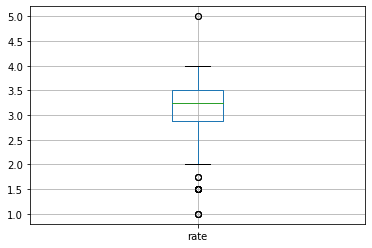

In [49]:
print ('Данные по рейтингу:')
best_bar.boxplot(column='rate')
best_bar.rate.describe()

**Как мы видим, среднее значение рейтинга по всем батончикам варьируется от 3,0 до 3,5. Так же есть какой то единичный случай с отметкой аж в 5 баллов. И имеется самая худшая отметка в 1 балл.**

Данные по процентному содержанию како бобов:


count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: percent, dtype: float64

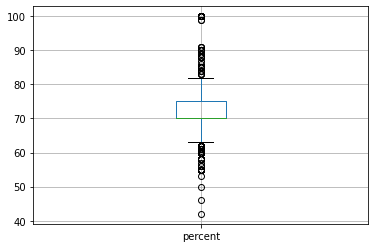

In [50]:
print ('Данные по процентному содержанию како бобов:')
best_bar.boxplot(column='percent')
best_bar.percent.describe()

**В большинстве случаев батончик содержит 70-75% какао бобов. Однако есть такие производители, кто доходит и до 100%, а есть те, кто и вовсе использует меньше 50%, но это единичные случаи.**

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [53]:
best_bar.bean_orig.value_counts()
print('Количество мест происхождения бобов:', 
      len(best_bar.bean_orig.value_counts()))

Количество мест происхождения бобов: 100


После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

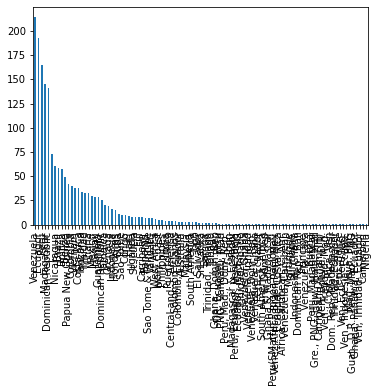

In [55]:
best_bar.bean_orig.value_counts().plot(kind='bar')

**По данной гистограмме трудно что-либо разобрать**

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [58]:
best_bar = best_bar.dropna(axis=0)
best_bar.tail(10)

,company_loc,rate,percent,bean_orig
1785,Austria,3.00,75.0,Papua New Guinea
1786,Austria,3.25,90.0,Bolivia
1787,Austria,3.75,70.0,Dominican Republic
1788,Austria,3.25,68.0,Congo
1789,Austria,3.50,58.0,
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India
1794,Austria,3.00,65.0,Brazil


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [59]:
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [83]:
maska = best_bar.bean_orig != '\xa0'
best_bar = best_bar[maska]
best_bar.tail(10)

,company_loc,rate,percent,bean_orig
1784,Austria,3.00,75.0,Ecuador
1785,Austria,3.00,75.0,Papua New Guinea
1786,Austria,3.25,90.0,Bolivia
1787,Austria,3.75,70.0,Dominican Republic
1788,Austria,3.25,68.0,Congo
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India
1794,Austria,3.00,65.0,Brazil


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [86]:
maska1 = best_bar.bean_orig.value_counts() <= 5
def a(barr):
    return maska1[barr]

new = best_bar.bean_orig.apply(a)
best_bar.bean_orig = best_bar.bean_orig.mask(new, 'complex')

In [87]:
best_bar.head(10)

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,complex
2,France,3.00,70.0,complex
3,France,3.50,70.0,complex
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

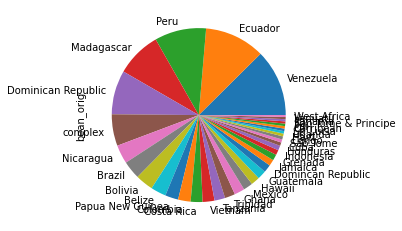

In [90]:
best_bar.bean_orig.value_counts().plot.pie()

## Попарные графики распределений

In [93]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

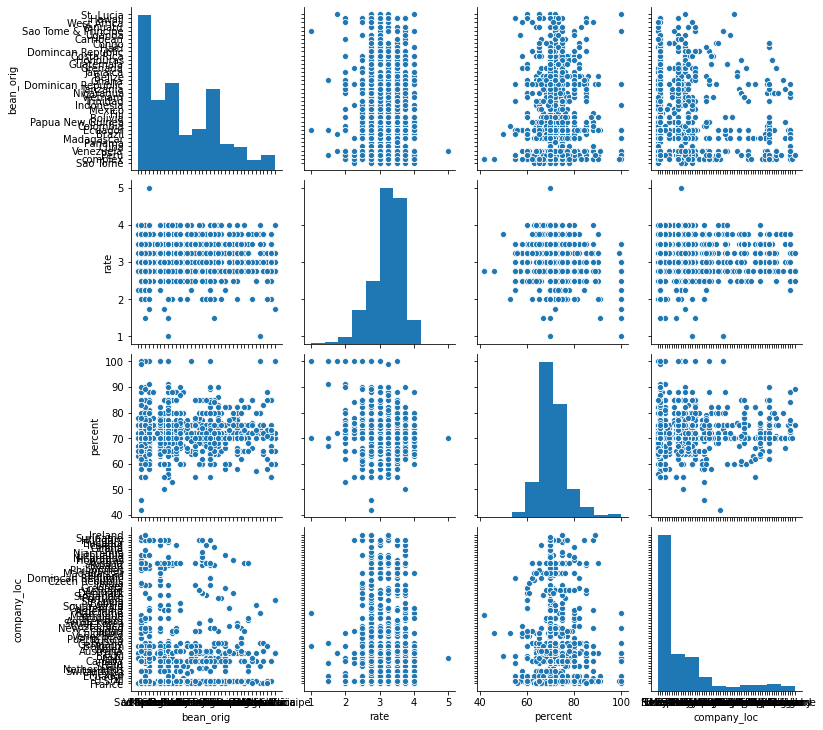

In [95]:
pairplot(best_bar, vars=['bean_orig', 'rate', 'percent', 'company_loc'])

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [112]:
best_bar.groupby(['bean_orig']).mean().sort_values(by='rate',
                                                   ascending=False).head(3)

,rate,percent
bean_orig,,
Haiti,3.388889,71.333333
Honduras,3.350000,73.933333
Congo,3.325000,70.500000


In [113]:
best_bar.groupby(['bean_orig']).median().sort_values(by='rate',
                                                   ascending=False).head(3)

,rate,percent
bean_orig,,
Honduras,3.500,72.0
Sao Tome & Principe,3.500,75.0
Brazil,3.375,70.0


**Несмотря на то, что данные производители не пользуются огромным спросом среди изготовителей батончиков, они показывают самый лучший результат среди потребителей.**